In [74]:
import numpy as np
import matplotlib.pylab as plt
import scipy.odr.odrpack as odrpack
from scipy.stats import pearsonr
import linmix

In [88]:
#data compiled in datamk.py
data = np.load('data_wcuts.npz')
cut_data = np.load('data_cut.npz')
atel_data = np.load('data_un.npz')
len(data['name']), len(cut_data['name']), len(atel_data['name'])

(85, 63, 22)

In [76]:
#ODR fitting
def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f)

#===Color Velocity
mydata_col = odrpack.RealData(data['col'], data['vel'], sx=data['colerr'], sy=data['velerr'])
myodr_col = odrpack.ODR(mydata_col, linear, beta0=[1.0,2.0])
myoutput_col = myodr_col.run()
b1_col = myoutput_col.beta[0]
b2_col = myoutput_col.beta[1]

#===x1 Velocity
mydata_x1 = odrpack.RealData(data['x1'], data['vel'], sx=data['x1err'], sy=data['velerr'])
myodr_x1 = odrpack.ODR(mydata_x1, linear, beta0=[1.0,2.0])
myoutput_x1 = myodr_x1.run()
b1_x1 = myoutput_x1.beta[0]
b2_x1 = myoutput_x1.beta[1]

#===mures Velocity
mydata_mures = odrpack.RealData(data['mures'], data['vel'], sx=data['muerr'], sy=data['velerr'])
myodr_mures = odrpack.ODR(mydata_mures, linear, beta0=[1.0,2.0])
myoutput_mures = myodr_mures.run()
b1_mures = myoutput_mures.beta[0]
b2_mures = myoutput_mures.beta[1]

In [77]:
#linmix fitting (Bayesian)
lm_col = linmix.LinMix(data['col'], data['vel'], xsig=data['colerr'], ysig=data['velerr'])
lm_col.run_mcmc(silent=True)

lm_x1 = linmix.LinMix(data['x1'], data['vel'], xsig=data['x1err'], ysig=data['velerr'])
lm_x1.run_mcmc(silent=True)

lm_mu = linmix.LinMix(data['mures'], data['vel'], xsig=data['muerr'], ysig=data['velerr'])
lm_mu.run_mcmc(silent=True)

countp = 0
countn = 0
for i in range(len(lm_col.chain)):
	if (lm_col.chain[i]['beta']>0):
		countp+=1
	else:
		countn+=1
print countp, countn

877 9123


In [78]:
rvalue_col = round(pearsonr(data['col'], data['vel'])[0],5)
rvalue_x1 = round(pearsonr(data['x1'], data['vel'])[0],5)
rvalue_mures = round(pearsonr(data['mures'], data['vel'])[0],5)

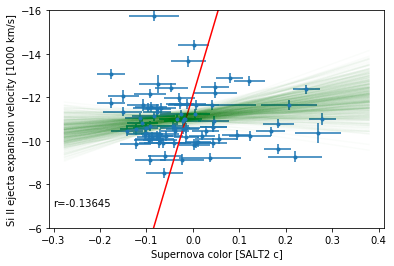

In [79]:
points_col = np.linspace(min(data['col'])-0.1, max(data['col'])+0.1)
points_x1 = np.linspace(min(data['x1'])-0.1, max(data['x1'])+0.1)
points_mures = np.linspace(min(data['mures'])-0.1, max(data['mures'])+0.1)

plt.figure()
#plotting points with errors
plt.errorbar(data['col'],data['vel'],xerr=data['colerr'],yerr=data['velerr'],fmt='.-',linestyle=' ')
#plotting ODR fit
plt.plot(points_col,f([b1_col,b2_col],points_col), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_col.chain),25):
	ys = lm_col.chain[i]['alpha'] + points_col * lm_col.chain[i]['beta']
	plt.plot(points_col, ys, color='g', alpha=0.02)
alpha_col = np.median(lm_col.chain['alpha'])
beta_col = np.median(lm_col.chain['beta'])
y_col = alpha_col + points_col*beta_col
plt.gca().invert_yaxis()
plt.ylim([-6,-16])
plt.text(-0.3, -7, 'r=' + str(rvalue_col))
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Supernova color [SALT2 c]')
plt.show()

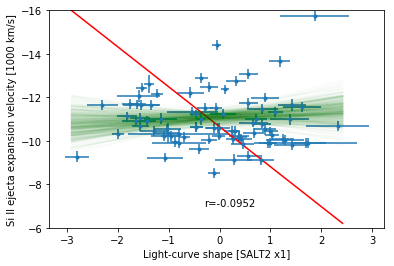

In [80]:
plt.figure()
#plotting points with errors
plt.errorbar(data['x1'],data['vel'],xerr=data['x1err'],yerr=data['velerr'],fmt='.-',linestyle=' ')
#plotting ODR fit
plt.plot(points_x1,f([b1_x1,b2_x1],points_x1), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_x1.chain),25):
	ys = lm_x1.chain[i]['alpha'] + points_x1 * lm_x1.chain[i]['beta']
	plt.plot(points_x1, ys, color='g', alpha=0.02)
alpha_x1 = np.median(lm_x1.chain['alpha'])
beta_x1 = np.median(lm_x1.chain['beta'])
y_x1 = alpha_x1 + points_x1*beta_x1
plt.gca().invert_yaxis()
plt.ylim([-6,-16])
plt.text(-0.3, -7, 'r=' + str(rvalue_x1))
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Light-curve shape [SALT2 x1]')
plt.show()

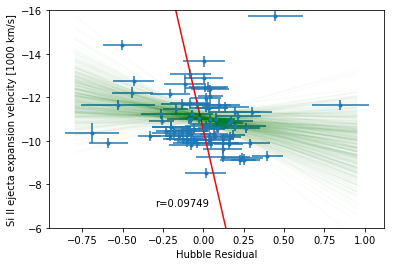

In [81]:
plt.figure()
#plotting points with errors
plt.errorbar(data['mures'],data['vel'],xerr=data['muerr'],yerr=data['velerr'],fmt='.-',linestyle=' ')
#plotting ODR fit
plt.plot(points_mures,f([b1_mures,b2_mures],points_mures), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_mu.chain),25):
	ys = lm_mu.chain[i]['alpha'] + points_mures * lm_mu.chain[i]['beta']
	plt.plot(points_mures, ys, color='g', alpha=0.02)
alpha_mures = np.median(lm_mu.chain['alpha'])
beta_mures = np.median(lm_mu.chain['beta'])
y_mures = alpha_mures + points_mures*beta_mures
plt.gca().invert_yaxis()
plt.ylim([-6,-16])
plt.text(-0.3, -7, 'r=' + str(rvalue_mures))
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Hubble Residual')
plt.show()

In [82]:
#ODR fitting with larger dataset
#===Color Velocity
mydata_col_big = odrpack.RealData(np.concatenate((data['col'],atel_data['col']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), sx=np.concatenate((data['colerr'],atel_data['colerr']),axis=0), sy=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
myodr_col_big = odrpack.ODR(mydata_col_big, linear, beta0=[1.0,2.0])
myoutput_col_big = myodr_col_big.run()
b1_col_big = myoutput_col_big.beta[0]
b2_col_big = myoutput_col_big.beta[1]

#===x1 Velocity
mydata_x1_big = odrpack.RealData(np.concatenate((data['x1'],atel_data['x1']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), sx=np.concatenate((data['x1err'],atel_data['x1err']),axis=0), sy=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
myodr_x1_big = odrpack.ODR(mydata_x1_big, linear, beta0=[1.0,2.0])
myoutput_x1_big = myodr_x1_big.run()
b1_x1_big = myoutput_x1_big.beta[0]
b2_x1_big = myoutput_x1_big.beta[1]

#===mures Velocity
mydata_mures_big = odrpack.RealData(np.concatenate((data['mures'],atel_data['mures']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), sx=np.concatenate((data['muerr'],atel_data['muerr']),axis=0), sy=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
myodr_mures_big = odrpack.ODR(mydata_mures_big, linear, beta0=[1.0,2.0])
myoutput_mures_big = myodr_mures_big.run()
b1_mures_big = myoutput_mures_big.beta[0]
b2_mures_big = myoutput_mures_big.beta[1]

In [83]:
#linmix fitting (Bayesian) with larger dataset
lm_col_big = linmix.LinMix(np.concatenate((data['col'],atel_data['col']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), xsig=np.concatenate((data['colerr'],atel_data['colerr']),axis=0), ysig=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
lm_col_big.run_mcmc(silent=True)

lm_x1_big = linmix.LinMix(np.concatenate((data['x1'],atel_data['x1']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), xsig=np.concatenate((data['x1err'],atel_data['x1err']),axis=0), ysig=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
lm_x1_big.run_mcmc(silent=True)

lm_mu_big = linmix.LinMix(np.concatenate((data['mures'],atel_data['mures']),axis=0), np.concatenate((data['vel'],atel_data['vel']),axis=0), xsig=np.concatenate((data['muerr'],atel_data['muerr']),axis=0), ysig=np.concatenate((data['velerr'],atel_data['velerr']),axis=0))
lm_mu_big.run_mcmc(silent=True)

countp = 0
countn = 0
for i in range(len(lm_col_big.chain)):
	if (lm_col_big.chain[i]['beta']>0):
		countp+=1
	else:
		countn+=1
print countp, countn

1385 8615


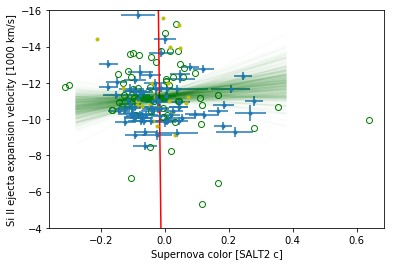

In [84]:
plt.figure()
#plotting points with errors
plt.errorbar(data['col'],data['vel'],xerr=data['colerr'],yerr=data['velerr'],fmt='.-',linestyle=' ')
plt.plot(cut_data['col'],cut_data['vel'],'go',mfc='none')
#plotting ODR fit
plt.plot(points_col,f([b1_col_big,b2_col_big],points_col), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_col.chain),25):
	ys = lm_col_big.chain[i]['alpha'] + points_col * lm_col_big.chain[i]['beta']
	plt.plot(points_col, ys, color='g', alpha=0.02)
alpha_col = np.median(lm_col_big.chain['alpha'])
beta_col = np.median(lm_col_big.chain['beta'])
y_col = alpha_col + points_col*beta_col
plt.plot(atel_data['col'],atel_data['vel'],'y.')
plt.gca().invert_yaxis()
plt.ylim([-4,-16])
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Supernova color [SALT2 c]')
plt.show()

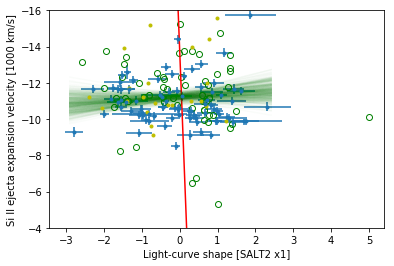

In [85]:
plt.figure()
#plotting points with errors
plt.errorbar(data['x1'],data['vel'],xerr=data['x1err'],yerr=data['velerr'],fmt='.-',linestyle=' ')
plt.plot(cut_data['x1'],cut_data['vel'],'go',mfc='none')
#plotting ODR fit
plt.plot(points_col,f([b1_x1_big,b2_x1_big],points_x1), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_x1.chain),25):
	ys = lm_x1_big.chain[i]['alpha'] + points_x1 * lm_x1_big.chain[i]['beta']
	plt.plot(points_x1, ys, color='g', alpha=0.02)
alpha_x1 = np.median(lm_x1_big.chain['alpha'])
beta_x1 = np.median(lm_x1_big.chain['beta'])
y_x1 = alpha_x1 + points_x1*beta_col
plt.plot(atel_data['x1'],atel_data['vel'],'y.')
plt.gca().invert_yaxis()
plt.ylim([-4,-16])
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Light-curve shape [SALT2 x1]')
plt.show()

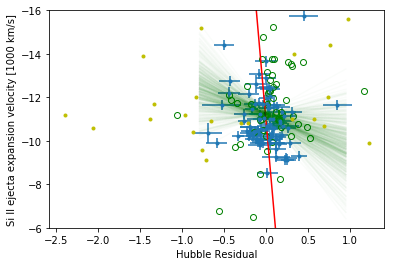

In [86]:
plt.figure()
#plotting points with errors
plt.errorbar(data['mures'],data['vel'],xerr=data['muerr'],yerr=data['velerr'],fmt='.-',linestyle=' ')
plt.plot(cut_data['mures'],cut_data['vel'],'go',mfc='none')
#plotting ODR fit
plt.plot(points_mures,f([b1_mures_big,b2_mures_big],points_mures), 'r')
#plotting linmix fits
for i in xrange(0, len(lm_mu_big.chain),25):
	ys = lm_mu_big.chain[i]['alpha'] + points_mures * lm_mu_big.chain[i]['beta']
	plt.plot(points_mures, ys, color='g', alpha=0.02)
alpha_mures = np.median(lm_mu_big.chain['alpha'])
beta_mures = np.median(lm_mu_big.chain['beta'])
y_mures = alpha_mures + points_mures*beta_mures
plt.plot(atel_data['x1'],atel_data['vel'],'y.')
plt.gca().invert_yaxis()
plt.ylim([-6,-16])
plt.ylabel('Si II ejecta expansion velocity [1000 km/s]')
plt.xlabel('Hubble Residual')
plt.show()

In [90]:
#Dividing the sample into high and low-velocity as found by Wang09
vel_hv = []
vel_lv = []
mu_hv = []
mu_lv = []

for i in range(len(data['vel'])):
    if (data['vel'][i] < -11.8):
        vel_hv.append(data['vel'][i])
        mu_hv.append(data['mures'][i])
    else:
        vel_lv.append(data['vel'][i])
        mu_lv.append(data['mures'][i])

np.std(mu_lv), np.std(mu_hv), np.std(data['mures'])

(0.22311222392654426, 0.23282243233846692, 0.22731773131509606)